In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("D:\ETUDES\Etude Machine Learning Marouan\Walmart project/train.csv")
df_store = pd.read_csv("D:\ETUDES\Etude Machine Learning Marouan\Walmart project/stores.csv")
df_feature = pd.read_csv("D:\ETUDES\Etude Machine Learning Marouan\Walmart project/features.csv")

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:3: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:3: SyntaxWarning: invalid escape sequence '\E'
C:\Users\marou\AppData\Local\Temp\ipykernel_23404\76867537.py:1: SyntaxWarning: invalid escape sequence '\E'
  df_train = pd.read_csv("D:\ETUDES\Etude Machine Learning Marouan\Walmart project/train.csv")
C:\Users\marou\AppData\Local\Temp\ipykernel_23404\76867537.py:2: SyntaxWarning: invalid escape sequence '\E'
  df_store = pd.read_csv("D:\ETUDES\Etude Machine Learning Marouan\Walmart project/stores.csv")
C:\Users\marou\AppData\Local\Temp\ipykernel_23404\76867537.py:3: SyntaxWarning: invalid escape sequence '\E'
  df_feature = pd.read_csv("D:\ETUDES\Etude Machine Learning Marouan\Walmart project/features.csv")


In [7]:
df_train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_store.head()


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
df = df_train.merge(df_store,on='Store')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [12]:
columns_using = ['Store','Date','Temperature','Fuel_Price','CPI','Unemployment']

df = df.merge(df_feature[columns_using],on=['Store','Date'])

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


In [14]:
#EDA

In [15]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [24]:
#fixer les datatypes et ajouter des nouvelle columns

df[['Store','Dept']] = df[['Store','Dept']].astype(str)

df['Date']= pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

In [25]:
df.dtypes

Store                   object
Dept                    object
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Month                    int32
dtype: object

In [26]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,2
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,2
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,2
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,3


In [27]:
df.describe(include='number')

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Month
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,136727.915739,60.090059,3.361027,171.201947,7.960289,6.449510
std,22711.183519,60980.583328,18.447931,0.458515,39.159276,1.863296,3.243217
min,-4988.940000,34875.000000,-2.060000,2.472000,126.064000,3.879000,1.000000
25%,2079.650000,93638.000000,46.680000,2.933000,132.022667,6.891000,4.000000
50%,7612.030000,140167.000000,62.090000,3.452000,182.318780,7.866000,6.000000
75%,20205.852500,202505.000000,74.280000,3.738000,212.416993,8.572000,9.000000
max,693099.360000,219622.000000,100.140000,4.468000,227.232807,14.313000,12.000000


In [28]:
df.describe(include='object')

,Store,Dept,Type
count,421570,421570,421570
unique,45,81,3
top,13,1,A
freq,10474,6435,215478


In [30]:
# voir s'il existe des valeurs manquantes
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
dtype: int64

In [32]:
# creer une table pour les top 10 stores

top_n = 10
x_col = 'Store'
y_col = 'Weekly_Sales'

table = df.groupby(x_col)[y_col].sum().sort_values(ascending=False)

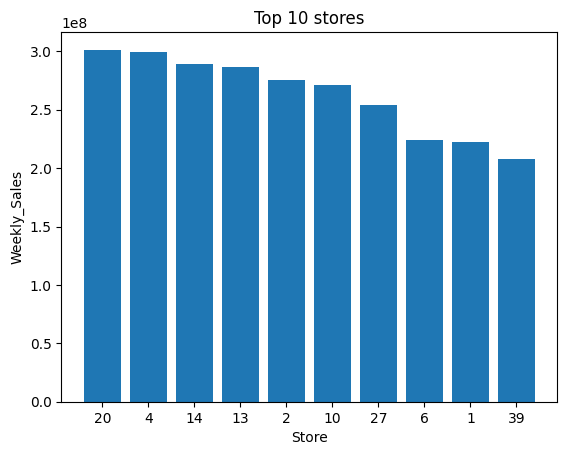

In [34]:
plt.bar(table.index[:top_n],table.values[:top_n])
plt.title('Top 10 stores')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

In [35]:
# pareil pour les top 10 departement

top_n = 10
x_col = 'Dept'
y_col = 'Weekly_Sales'

table = df.groupby(x_col)[y_col].sum().sort_values(ascending=False)

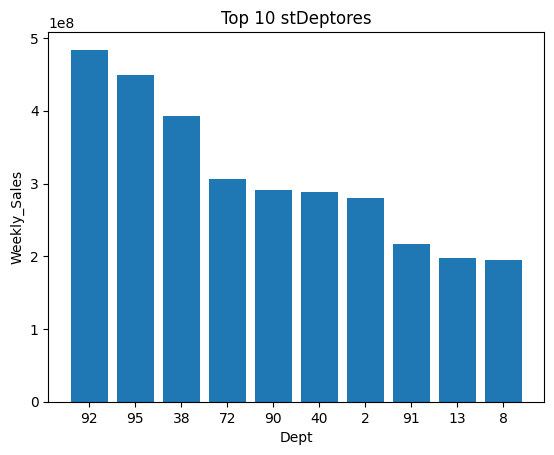

In [36]:
plt.bar(table.index[:top_n],table.values[:top_n])
plt.title('Top 10 stDeptores')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

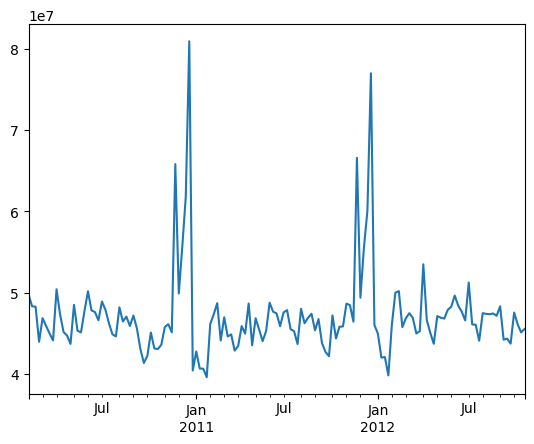

In [39]:
#checker les weekly_sales

data = df.groupby('Date')['Weekly_Sales'].sum()
data.plot()
plt.xlabel(None)
plt.show()

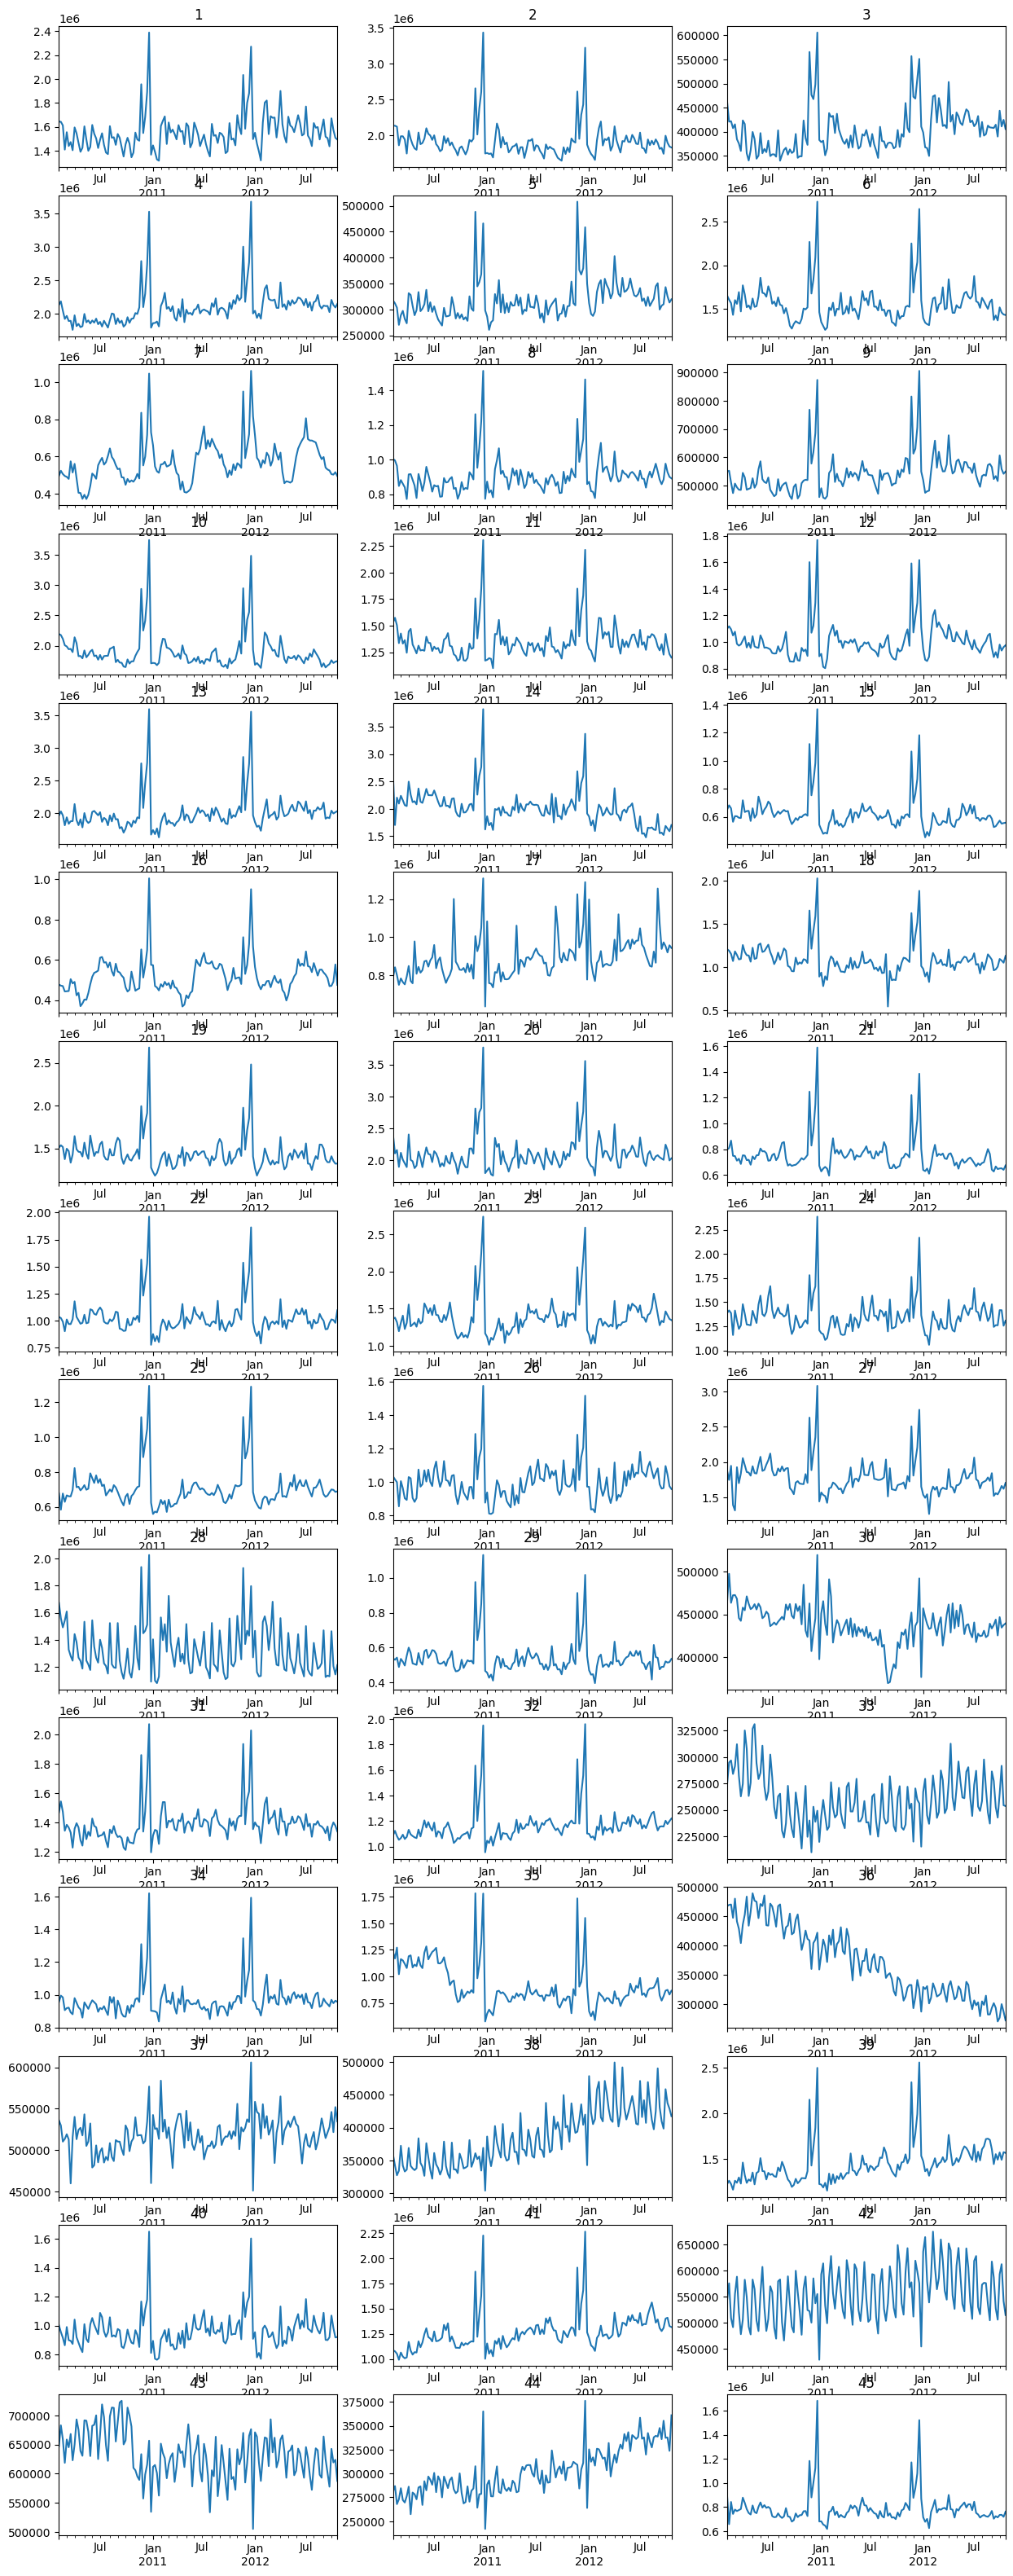

In [43]:
# Nous allons voir la meme chose pour chaque store

plt.figure(figsize=(15,40))

for store, df_store in df.groupby('Store'):
    data = df_store.groupby('Date')['Weekly_Sales'].sum()
    plt.subplot(15,3,int(store))
    data.plot()
    plt.title(store)
    plt.xlabel(None)
plt.show()

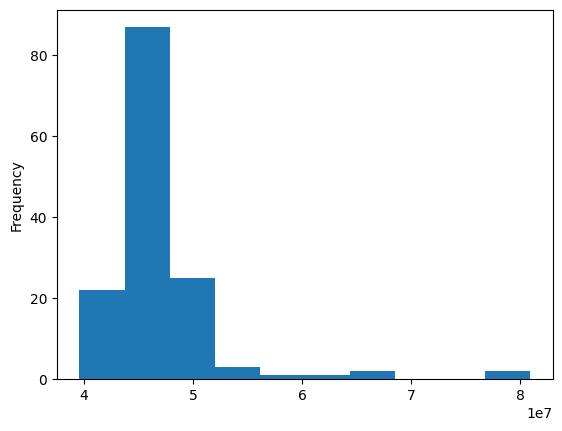

In [44]:
data = df.groupby('Date')['Weekly_Sales'].sum()
data.plot.hist()
plt.show()


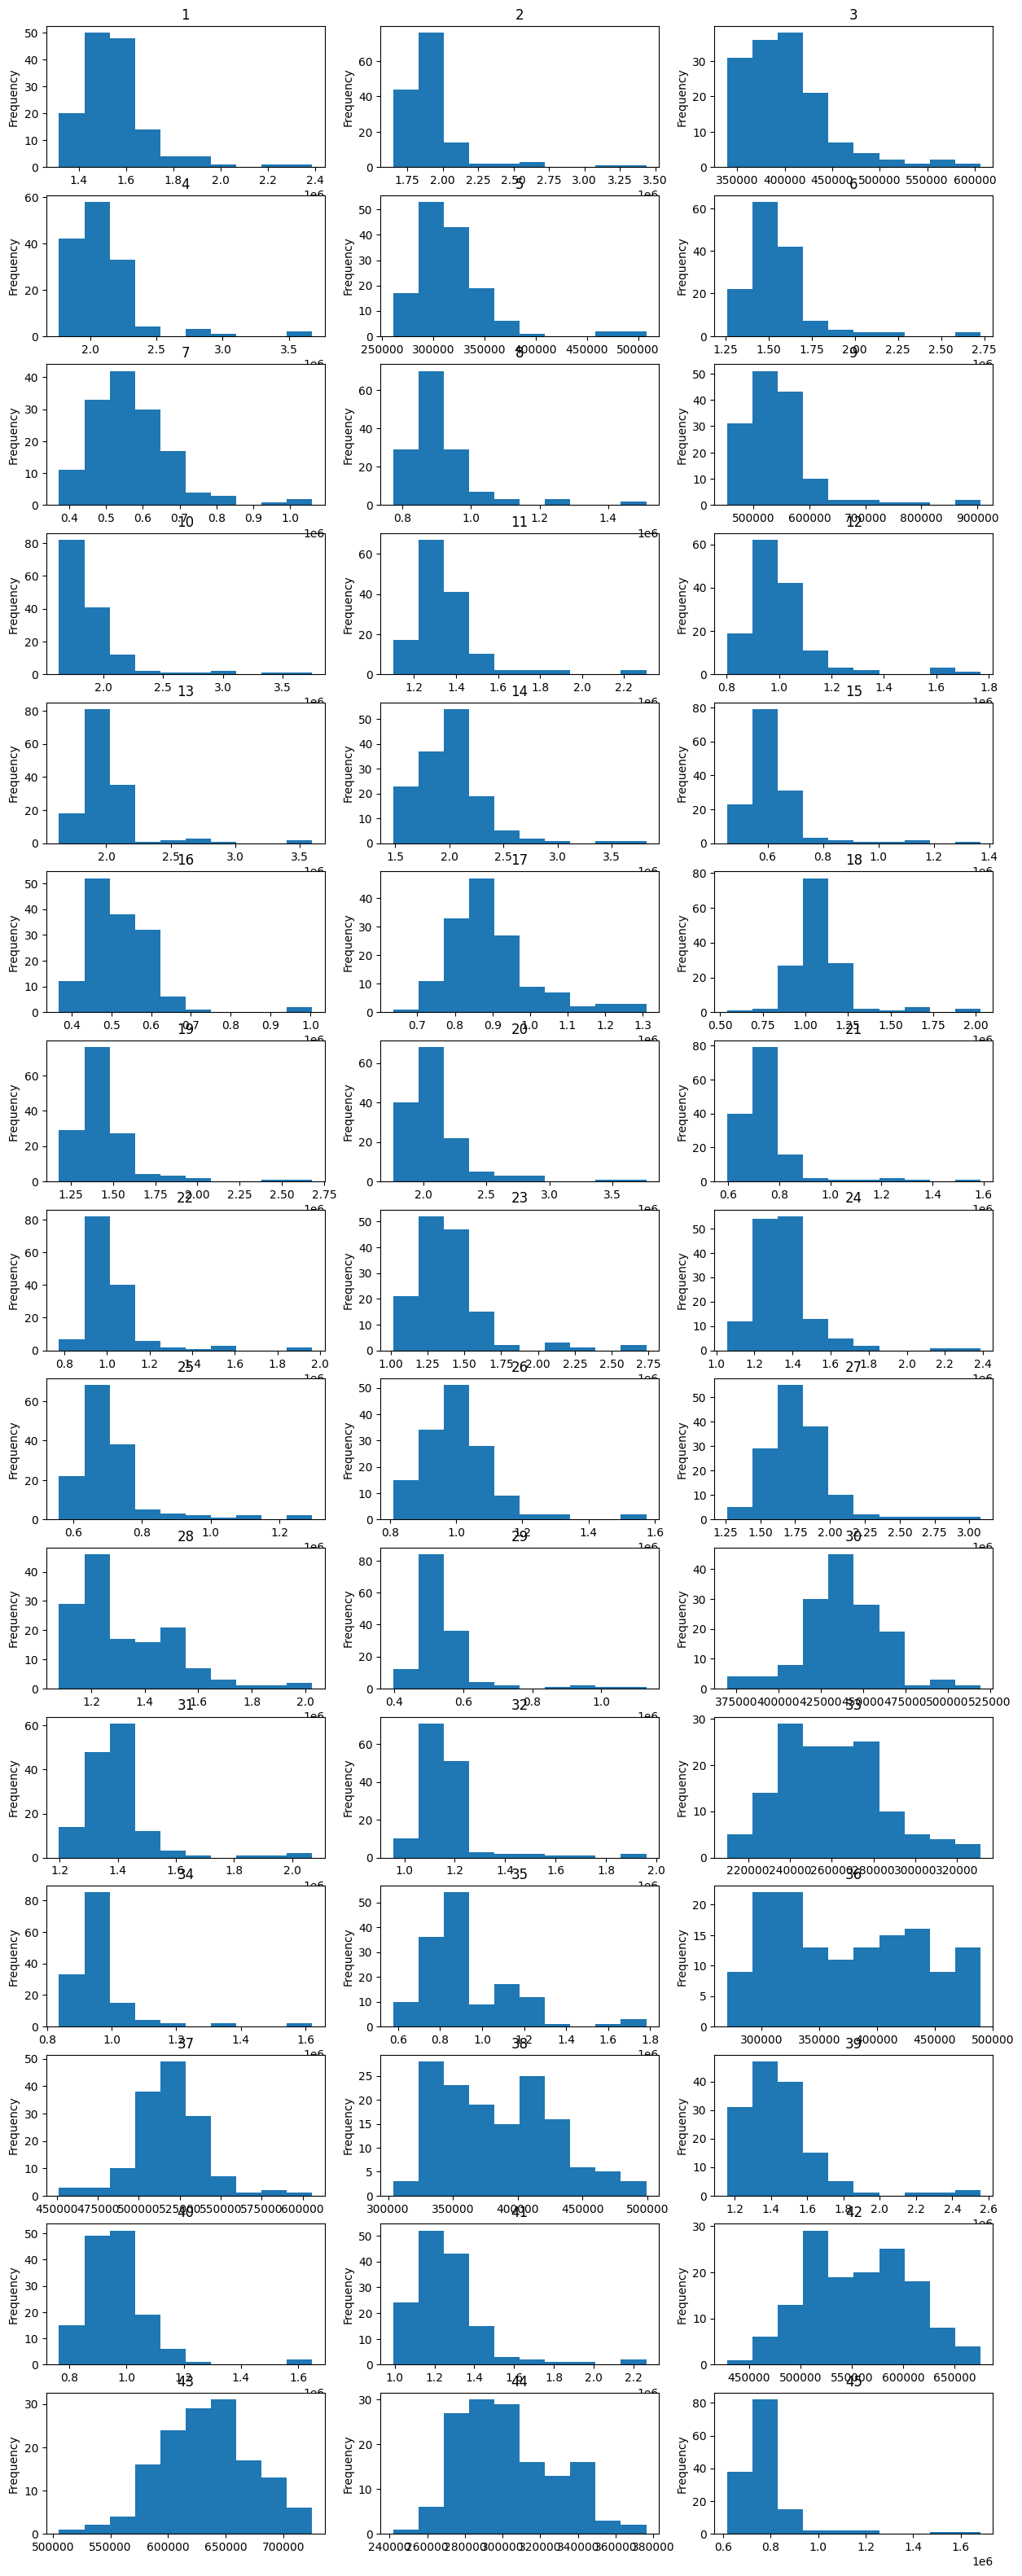

In [45]:
# Storewise Weekly Sales Distribution
plt.figure(figsize=(15,40))
for store,df_store in df.groupby('Store'):
    data=df_store.groupby(['Date'])['Weekly_Sales'].sum()
    plt.subplot(15,3,int(store))
    data.plot.hist()
    plt.title(store)
    plt.xlabel(None)
    
plt.show()

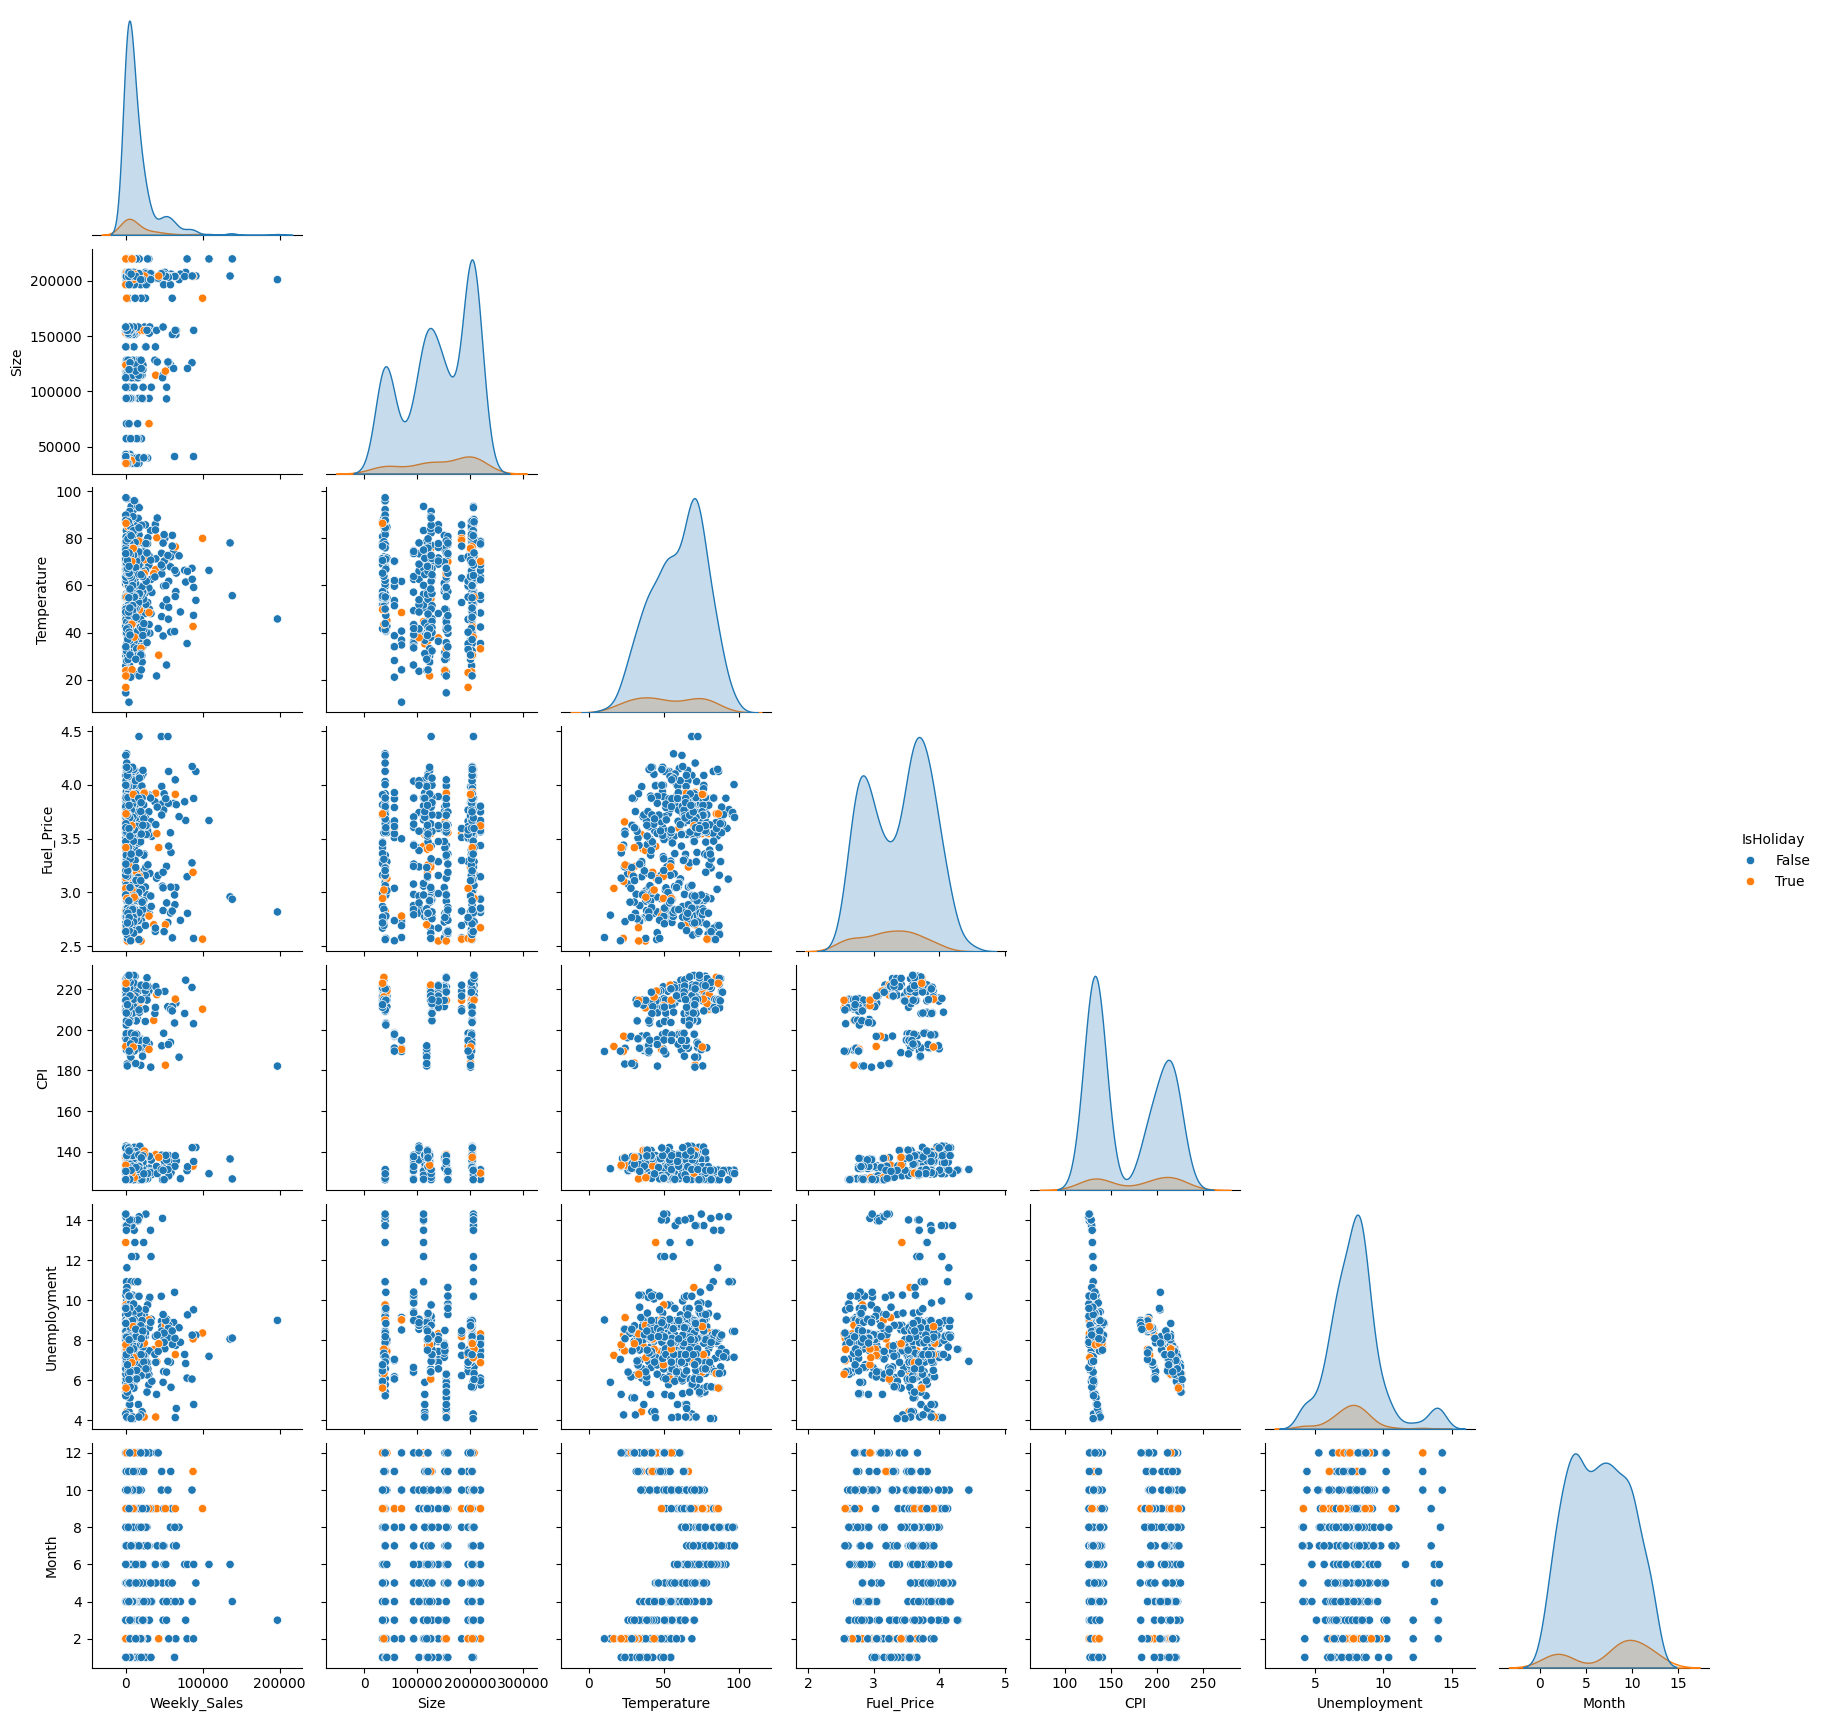

In [46]:
# taking samples from the original dataset to plot the pair plot
sns.pairplot(df.sample(500,random_state=5),hue="IsHoliday",corner=True)
plt.show()

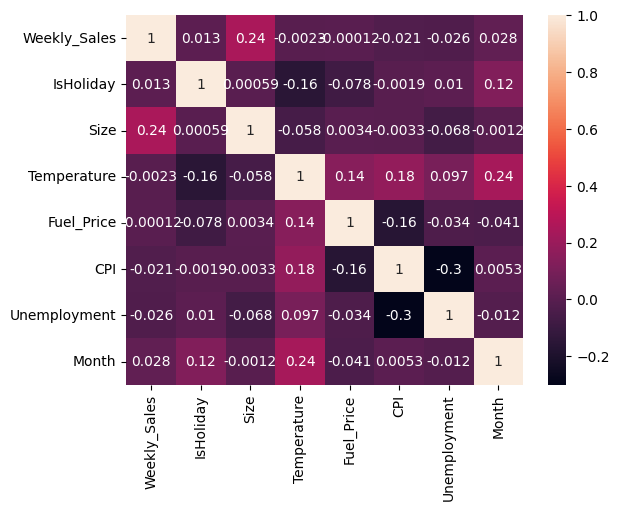

In [47]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [49]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
one_hot_encoded_stores = OneHotEncoder(drop='first',max_categories=10, sparse_output=False).fit(df[["Store"]])

one_hot_encoded_stores

OneHotEncoder(drop='first', max_categories=10, sparse_output=False)

In [50]:
one_hot_encoded_stores.get_feature_names_out()

array(['Store_10', 'Store_13', 'Store_2', 'Store_20', 'Store_24',
       'Store_27', 'Store_34', 'Store_4', 'Store_infrequent_sklearn'],
      dtype=object)

In [51]:
df_one_hot_encoded_stores = pd.DataFrame(one_hot_encoded_stores.transform(df[['Store']]),columns= one_hot_encoded_stores.get_feature_names_out())
df_one_hot_encoded_stores['Weekly_Sales']= df['Weekly_Sales']

<Axes: >

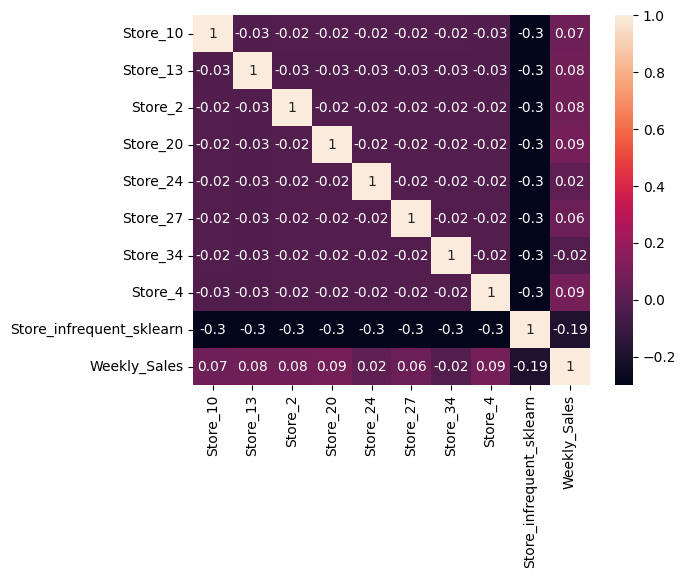

In [53]:
sns.heatmap(df_one_hot_encoded_stores.corr(numeric_only=True).round(2),annot=True)

In [54]:
numerical_cols = ["Size","Temperature",'Fuel_Price','CPI','Unemployment']
StandardScaler().fit_transform(df[numerical_cols])

array([[ 0.23920895, -0.96379804, -1.72083413,  1.01877417,  0.07820093],
       [ 0.23920895, -1.16978344, -1.77317713,  1.02249773,  0.07820093],
       [ 0.23920895, -1.09280995, -1.84732972,  1.02369727,  0.07820093],
       ...,
       [-0.30348902, -0.30464475,  1.39357464,  0.53947228,  0.37928066],
       [-0.30348902, -0.19623138,  1.32596493,  0.53956392,  0.37928066],
       [-0.30348902, -0.06721947,  1.13622153,  0.53900326,  0.37928066]])

In [55]:
from sklearn.impute import SimpleImputer
SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df[numerical_cols])

array([[1.51315000e+05, 4.23100000e+01, 2.57200000e+00, 2.11096358e+02,
        8.10600000e+00],
       [1.51315000e+05, 3.85100000e+01, 2.54800000e+00, 2.11242170e+02,
        8.10600000e+00],
       [1.51315000e+05, 3.99300000e+01, 2.51400000e+00, 2.11289143e+02,
        8.10600000e+00],
       ...,
       [1.18221000e+05, 5.44700000e+01, 4.00000000e+00, 1.92327265e+02,
        8.66700000e+00],
       [1.18221000e+05, 5.64700000e+01, 3.96900000e+00, 1.92330854e+02,
        8.66700000e+00],
       [1.18221000e+05, 5.88500000e+01, 3.88200000e+00, 1.92308899e+02,
        8.66700000e+00]])

Modeling

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split

In [58]:
numeric_preprocessor = Pipeline(
    steps= [("imputation_mean", SimpleImputer(missing_values=np.nan,strategy="mean")),('scaler',StandardScaler())]

)

categorial_preprocessor = Pipeline(
    steps= [("Imputaton_most_frequent",SimpleImputer(fill_value="missing",strategy="most_frequent")),('Onehot',OneHotEncoder(handle_unknown="ignore",max_categories=12,drop='first'))]

)

categorial_col = ['Store','Dept','Type','IsHoliday']
numerical_cols

Preprocessor = ColumnTransformer(
    [('categorial',categorial_preprocessor,categorial_col),('numerical',numeric_preprocessor,numerical_cols)
])

Preprocessor

ColumnTransformer(transformers=[('categorial',
                                 Pipeline(steps=[('Imputaton_most_frequent',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='most_frequent')),
                                                 ('Onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                max_categories=12))]),
                                 ['Store', 'Dept', 'Type', 'IsHoliday']),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Size', 'Temperature', 'Fuel_Price', 'CPI',
                                  'Unemployment'])])

In [59]:
df_sample = df.sample(5000,random_state=5)

x = df_sample[categorial_col+numerical_cols]
y = df_sample[['Date','Weekly_Sales']].set_index('Date')

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=10)

In [60]:
x_train.head()

,Store,Dept,Type,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment
49708,6,7,A,False,202505,70.35,3.622,216.624433,6.855
13037,2,21,A,False,202307,43.82,3.510,220.065199,7.057
10989,2,6,A,False,202307,81.83,2.577,211.188693,8.099
181328,19,32,A,False,203819,46.53,3.112,132.152129,8.185
103242,11,41,A,True,207499,55.03,2.943,214.698647,7.564


In [61]:
y_train.head()

,Weekly_Sales
Date,
2011-04-08,29558.73
2012-02-17,9390.08
2010-09-03,5343.92
2010-05-14,13324.78
2010-12-31,1485.78


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
ds = DecisionTreeRegressor(random_state=4, max_depth=4)
ls = Lasso(random_state=4,selection='random',tol=1e-3)
rd = Ridge(random_state=4,tol=1e-3)

model_to_try = [ds,ls,rd,rf]

In [78]:
all_pipelines = {}
for m in model_to_try:
    # Create a scikit-learn pipeline
    all_pipelines[m] = pipeline = make_pipeline(Preprocessor, m)
    # Perform cross-validation on the training data
    cross_val_scores = cross_val_score(pipeline, x_train, y_train, cv=4, scoring='r2')
    print(m)
    print(f"Cross-Validation Scores: {cross_val_scores}")
    print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores)}\n")

DecisionTreeRegressor(max_depth=4, random_state=4)
Cross-Validation Scores: [0.13912863 0.15707996 0.23541101 0.17688826]
Mean Cross-Validation Score: 0.17712696432246952

Lasso(random_state=4, selection='random', tol=0.001)
Cross-Validation Scores: [0.13673277 0.16745302 0.24449098 0.17721488]
Mean Cross-Validation Score: 0.18147291152305006

Ridge(random_state=4, tol=0.001)
Cross-Validation Scores: [0.13589192 0.16743484 0.24443447 0.17878719]
Mean Cross-Validation Score: 0.1816371062132676



C:\Users\marou\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\marou\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\marou\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\marou\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed whe

RandomForestRegressor(max_depth=4, random_state=4)
Cross-Validation Scores: [0.14698812 0.15492602 0.25596298 0.18999331]
Mean Cross-Validation Score: 0.1869676064557996



In [79]:
all_pipelines[rf].fit(x_train, y_train)

C:\Users\marou\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorial',
                                                  Pipeline(steps=[('Imputaton_most_frequent',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('Onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=12))]),
                                                  ['Store', 'Dept', 'Type',
                                                   'IsHoliday']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Size', 'Temperature',
                                                   'Fuel_Price', 'CPI',
                                                   'Unemployment'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, random_state=4))])

In [81]:
y_pred = all_pipelines[rf].predict(x_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
r2 = r2_score(y_test, y_pred)
print(f'Test RMSE of best model = {rmse}')
print(f'Test R2 Score of best model = {r2}')

Test RMSE of best model = 19833.51796188308
Test R2 Score of best model = 0.25110598003648665


C:\Users\marou\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [82]:
df_temp = df
X = df_temp[categorial_col+numerical_cols]
y = df_temp[['Date','Weekly_Sales']].set_index('Date')

all_pipelines[rd].fit(X, y)
y_pred = all_pipelines[rd].predict(X)
rmse = np.sqrt(mean_squared_error(y_pred, y))
r2 = r2_score(y, y_pred)
# Note this is supposed to be high, since this is training RMSE and R2
print(f'Final Training RMSE = {rmse}')
print(f'Final Training R2 Score = {r2}')

Final Training RMSE = 18420.025721037964
Final Training R2 Score = 0.34218774291577025


In [71]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf = RandomForestRegressor(random_state=4,max_depth=4)